# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [207]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [208]:
air_df = pd.read_csv('data/air_cleaned.csv')
air_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51233 entries, 0 to 51232
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              51233 non-null  object 
 1   Injury.Severity         51233 non-null  object 
 2   Aircraft.damage         51233 non-null  object 
 3   Aircraft.Category       51233 non-null  object 
 4   Make                    51233 non-null  object 
 5   Model                   51233 non-null  object 
 6   Number.of.Engines       51233 non-null  float64
 7   Engine.Type             51233 non-null  object 
 8   Purpose.of.flight       46383 non-null  object 
 9   Total.Fatal.Injuries    51233 non-null  float64
 10  Total.Serious.Injuries  51233 non-null  float64
 11  Total.Minor.Injuries    51233 non-null  float64
 12  Total.Uninjured         51233 non-null  float64
 13  Weather.Condition       50452 non-null  object 
 14  Broad.phase.of.flight   39072 non-null

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [209]:
small_planes = air_df[air_df['N_passenger'] <= 20]
len(small_planes)

50409

In [210]:
large_planes = air_df[air_df['N_passenger'] > 20]
len(large_planes)

824

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [211]:
#Grouping the small planes by the make for the top lowest mean for fatal/seriously injured fraction

small_make_risk = (small_planes.groupby('Make')['S_njur_frac'].mean().sort_values().head(15))
small_df = small_make_risk.reset_index()
small_df['Plane Type'] = 'Small'
small_df.head()

Make  S_njur_frac Plane Type
0   Airbus Industrie     0.000000      Small
1  Grumman-Schweizer     0.099727      Small
2               Waco     0.106183      Small
3              Helio     0.120766      Small
4             Boeing     0.146617      Small

In [212]:
#Grouping the large planes by the make for the top lowest mean for fatal/seriously injured fraction

large_make_risk = (large_planes.groupby('Make')['S_njur_frac'].mean().sort_values().head(15))
large_df = large_make_risk.reset_index()
large_df['Plane Type'] = 'Large'
large_df.head()

Make  S_njur_frac Plane Type
0  Aero Commander     0.000000      Large
1     Dehavilland     0.000000      Large
2      Swearingen     0.000000      Large
3    Aerospatiale     0.003388      Large
4          Cessna     0.003521      Large

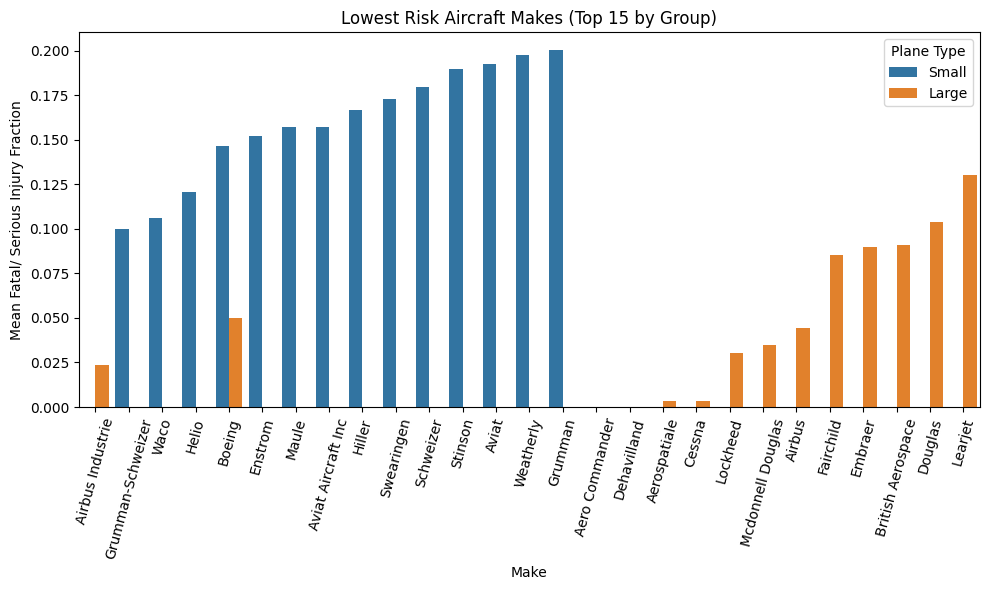

In [213]:
#Concating small and large plane df for the combined chart

combined_df = pd.concat([small_df, large_df], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data = combined_df,
    x = 'Make',
    y = 'S_njur_frac',
    hue = 'Plane Type'
)
plt.xticks(rotation = 75)
plt.ylabel('Mean Fatal/ Serious Injury Fraction')
plt.title('Lowest Risk Aircraft Makes (Top 15 by Group)')
plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

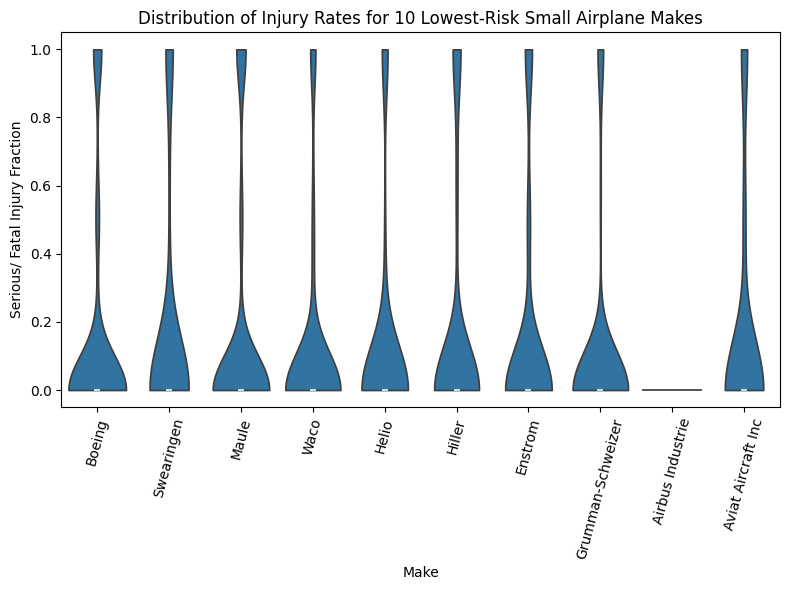

In [214]:
#Assigning the top 10 lowest lowest mean serious/fatal injury rates make to low_risk_makes
low_risk_makes = (small_planes.groupby('Make')['S_njur_frac'].mean().sort_values().head(10).index)

#Using the assigned low_risk_makes to get rest of the values and asssigning it to small_low_risk
small_low_risk = small_planes[small_planes['Make'].isin(low_risk_makes)]

plt.figure(figsize=(8, 6))
sns.violinplot(
    data = small_low_risk,
    x = 'Make',
    y = 'S_njur_frac',
    inner = 'box',
    cut = 0,
)
plt.xticks(rotation = 75)
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.title('Distribution of Injury Rates for 10 Lowest-Risk Small Airplane Makes')
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

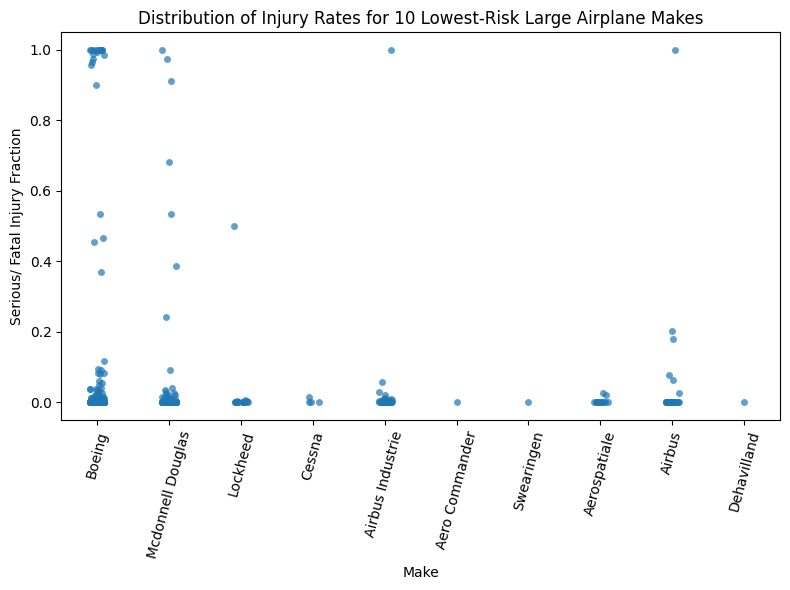

In [215]:
low_risk_large_makes = (large_planes.groupby('Make')['S_njur_frac'].mean().sort_values().head(10).index)

large_low_risk = large_planes[large_planes['Make'].isin(low_risk_large_makes)]

plt.figure(figsize = (8, 6))
sns.stripplot(
    data = large_low_risk,
    x = 'Make',
    y = 'S_njur_frac',
    alpha = 0.7
)
plt.xticks(rotation = 75)
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.title('Distribution of Injury Rates for 10 Lowest-Risk Large Airplane Makes')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [216]:
small_destruction_rate = (small_planes.groupby('Make')['Ap_destroyed'].mean().sort_values().head(15))
small_destruction_rate

Make
Airbus Industrie                  0.000000
Grumman Acft Eng Cor-Schweizer    0.000000
American Champion Aircraft        0.022727
Diamond Aircraft Ind Inc          0.030769
Dehavilland                       0.035294
Aviat Aircraft Inc                0.042857
Aviat                             0.066667
Waco                              0.072581
Maule                             0.091858
Luscombe                          0.094395
Air Tractor Inc                   0.101124
Boeing                            0.104623
Taylorcraft                       0.107843
Stinson                           0.111421
Rockwell International            0.121212
Name: Ap_destroyed, dtype: float64

In [217]:
large_destruction_rate = (large_planes.groupby('Make')['Ap_destroyed'].mean().sort_values().head(15))
large_destruction_rate

Make
Aero Commander       0.000000
Dehavilland          0.000000
Swearingen           0.000000
Aerospatiale         0.000000
Airbus Industrie     0.020000
Mcdonnell Douglas    0.054422
Airbus               0.057143
Boeing               0.057554
British Aerospace    0.090909
Embraer              0.093023
Douglas              0.102564
Lockheed             0.117647
De Havilland         0.160000
Cessna               0.250000
Fairchild            0.333333
Name: Ap_destroyed, dtype: float64

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

#### Recommendation based on Destroyed and Fatal/Serious Injury Fraction (S_njur_frac):
- We identified the 15 makes with the lowest mean serious/fatal injury fractions separately for small and large aircraft.
- Similar to injury risk, we found 15 makes with the lowest average aircraft destruction rates in each group.
- In Conclusion, from the analysis we have the make Airbus Industrie for the small and Aero Commander for the large airplane with low/ null Destroyed and Fatal/Serious Injury Fraction.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

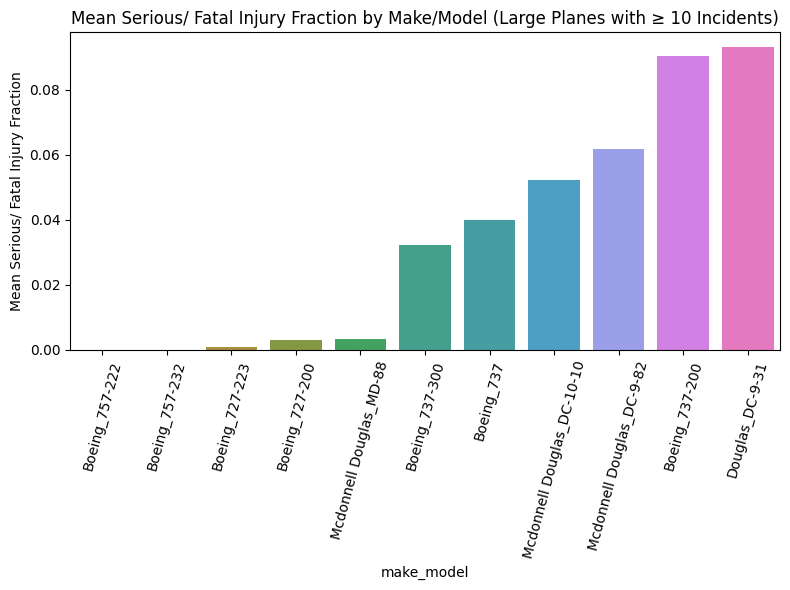

In [218]:
make_model_counts = large_planes['make_model'].value_counts()

valid_make_models = make_model_counts[make_model_counts >= 10].index
large_filtered = large_planes[large_planes['make_model'].isin(valid_make_models)]

mean_injury = (large_filtered.groupby('make_model')['S_njur_frac'].mean().sort_values().reset_index())

plt.figure(figsize=(8, 6))
sns.barplot(
    data = mean_injury,
    x = 'make_model',
    y = 'S_njur_frac',
    hue = 'make_model',
    legend = False
)
plt.xticks(rotation=75)
plt.ylabel('Mean Serious/ Fatal Injury Fraction')
plt.title('Mean Serious/ Fatal Injury Fraction by Make/Model (Large Planes with ≥ 10 Incidents)')
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

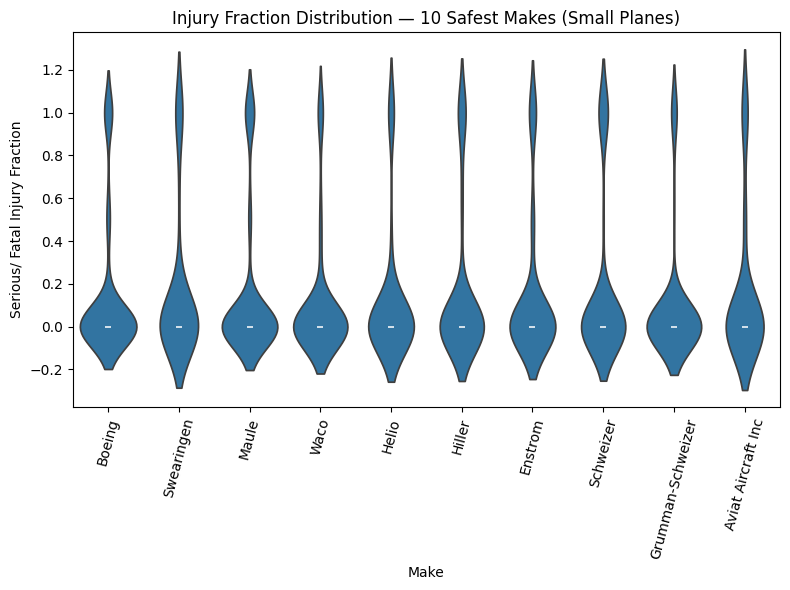

In [219]:
small_make_counts = small_planes['Make'].value_counts()
valid_small_makes = small_make_counts[small_make_counts >= 10].index

filtered_small = small_planes[small_planes['Make'].isin(valid_small_makes)]

mean_injury_small = (filtered_small.groupby('Make')['S_njur_frac'].mean().sort_values().head(10).index)

low_risk_small = filtered_small[filtered_small['Make'].isin(mean_injury_small)]

plt.figure(figsize = (8, 6))
sns.violinplot(
    data=low_risk_small,
    x = 'Make',
    y = 'S_njur_frac',
    inner = 'box',
)
plt.xticks(rotation = 75)
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.title('Injury Fraction Distribution — 10 Safest Makes (Small Planes)')
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### 1. Small Airplane Models
    The mean fatal/seriously injured fraction for small planes shows that a subset of models consistently achieve lower injury rates.

    The violinplot distribution reveals these safer models generally have tight distributions around low injury fractions, indicating consistent safety performance.

### 2. Large Airplane Models
    For larger planes, the mean injury fractions are generally higher than small planes, reflecting the greater complexity and operational risks of larger aircraft.

    The injury fraction distributions across large-plane models are wider and more variable, as shown in the violinplots.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

### Analysis plan:
1. Explore how different weather conditions relate to:

    - The fraction of serious/fatal injuries (S_njur_frac)

    - The rate of aircraft destruction (Ap_destroyed)

2. Visualize with boxplots or violinplots for injury fractions by weather

3. Show destruction rates by weather with a barplot

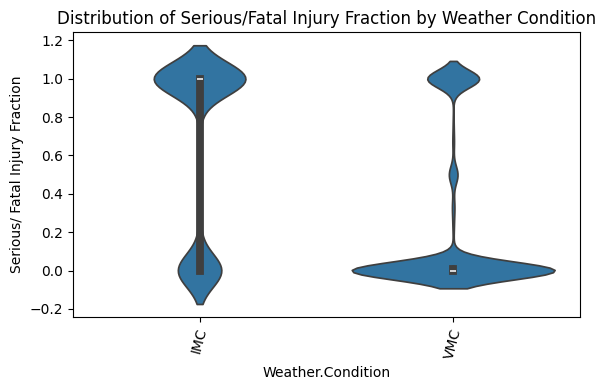

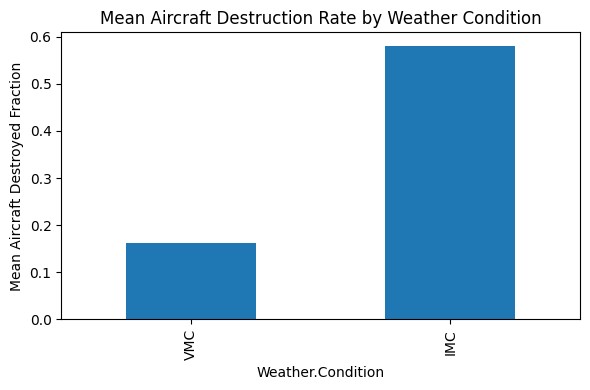

In [220]:
weather_df = air_df[air_df['Weather.Condition'].notna()]

plt.figure(figsize = (6, 4))
sns.violinplot(data = weather_df, x = 'Weather.Condition', y = 'S_njur_frac', inner = 'box')
plt.xticks(rotation = 75)
plt.title('Distribution of Serious/Fatal Injury Fraction by Weather Condition')
plt.ylabel('Serious/ Fatal Injury Fraction')
plt.tight_layout()
plt.show()

destruction_rate_weather = weather_df.groupby('Weather.Condition')['Ap_destroyed'].mean().sort_values()

plt.figure(figsize = (6, 4))
destruction_rate_weather.plot(kind = 'bar')
plt.ylabel('Mean Aircraft Destroyed Fraction')
plt.title('Mean Aircraft Destruction Rate by Weather Condition')
plt.tight_layout()
plt.show()

### Discussion:
Expect clear weather to have lower injury fractions and destruction rates.


### Analysis plan:
1. Evaluate injury fraction and destruction rate across flight phases.

    - Use boxplots/violinplots for injury fraction by phase of flight.
      

2. Barplot destruction rate by flight phase.

C:\Users\Aashi\AppData\Local\Temp\ipykernel_25160\1149483490.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data = phase_df, x = 'Broad.phase.of.flight', y = 'S_njur_frac', inner = 'box', scale = 'width')


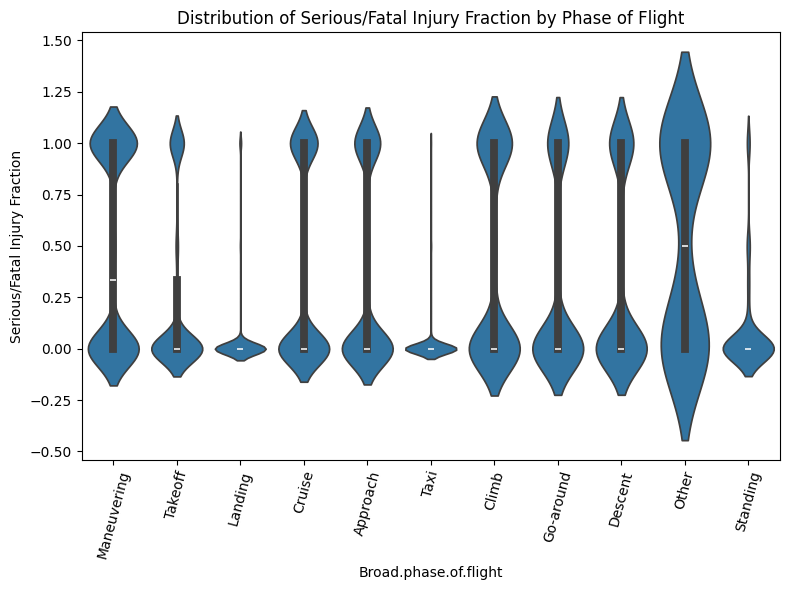

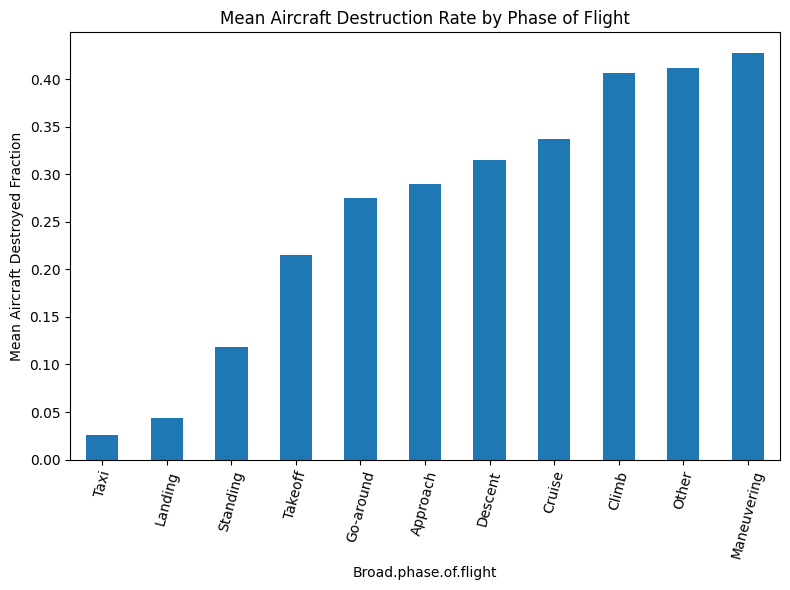

In [224]:
phase_df = air_df[air_df['Broad.phase.of.flight'].notna()]

plt.figure(figsize = (8, 6))
sns.violinplot(data = phase_df, x = 'Broad.phase.of.flight', y = 'S_njur_frac', inner = 'box', scale = 'width')
plt.xticks(rotation = 75)
plt.title('Distribution of Serious/Fatal Injury Fraction by Phase of Flight')
plt.ylabel('Serious/Fatal Injury Fraction')
plt.tight_layout()
plt.show()

destruction_rate_phase = phase_df.groupby('Broad.phase.of.flight')['Ap_destroyed'].mean().sort_values()

plt.figure(figsize = (8, 6))
destruction_rate_phase.plot(kind ='bar')
plt.ylabel('Mean Aircraft Destroyed Fraction')
plt.title('Mean Aircraft Destruction Rate by Phase of Flight')
plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

### Discussion:
Higher injury fractions and destruction rates are expected during takeoff, landing, or initial climb, where accidents are more critical.